Sequential(
  (0): Linear(in_features=784, out_features=300, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=300, out_features=200, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=200, out_features=10, bias=True)
)
Epoch: 000, train loss: 0.3323521, test loss: 0.3292393, train acc: 0.8964885, test acc: 0.8961982
Epoch: 001, train loss: 0.2445382, test loss: 0.2584822, train acc: 0.9249900, test acc: 0.9187898
Epoch: 002, train loss: 0.2006992, test loss: 0.2253929, train acc: 0.9384828, test acc: 0.9292396
Epoch: 003, train loss: 0.1720468, test loss: 0.2050574, train acc: 0.9481277, test acc: 0.9375000
Epoch: 004, train loss: 0.1511584, test loss: 0.1912974, train acc: 0.9543577, test acc: 0.9403861
Epoch: 005, train loss: 0.1347989, test loss: 0.1812663, train acc: 0.9599047, test acc: 0.9437699
Epoch: 006, train loss: 0.1213470, test loss: 0.1734988, train acc: 0.9640692, test acc: 0.9456608
Epoch: 007, train loss: 0.1099555, test loss: 0.1672486, train acc: 0.9678671, t

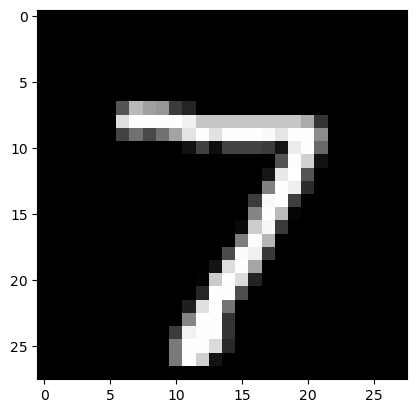

In [1]:
import numpy as np
import torch
import torchvision
from torchvision import datasets, transforms
from torch import nn, optim
import matplotlib.pyplot as plt

# ################## Part 1: load data and create batch ##################
trainset = datasets.MNIST('Train', transform=torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()]), download=True, train=True)
testset = datasets.MNIST('Test', transform=torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()]), download=True, train=False)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=64)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64)

# ################## Part 2: Define Model and initialize ##################
model = nn.Sequential(nn.Linear(784, 300, bias=True),
                      nn.Sigmoid(),
                      nn.Linear(300, 200, bias=True),
                      nn.Sigmoid(),
                      # nn.Linear(100, 50, bias=False),
                      # nn.Sigmoid(),
                      nn.Linear(200, 10, bias=True))
#nn.Tanh()

print(model)

# ############## This part can be changed to different initialization
# Initialize as 0

# Initialize as uniform [-1, 1]
for p in model.parameters():
    p.data.uniform_(-1, 1)


# def init_weights(m):
#    if isinstance(m, nn.Linear):
#        m.weight.data.uniform_(-1, 1)
#        m.bias.data.uniform_(-1, 1)

# Initialize as normal
# m.bias.data.normal_(0, 1)
# m.weight.data.normal_(0, 0.03)
#
# ########################################################################

# ################## Part 3: Define Loss and optimizer ##################

# ######## This can be changed to different loss function, e.g., L2loss
# ######## and different optimization parameter，e.g. regularization, learning rata.
#criterion = torch.nn.L2Loss()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.02, weight_decay=0.1)


# ########################################################################


def accuracy(out, labels):
    acc = (out.argmax(1) == labels).float().mean()
    return acc.item()


# ################## Part 4: Optimization ##################
def train_NN():
    model.train()
    acc = 0
    for images, labels in train_loader:
        images = images.view(images.shape[0], -1)
        out = model(images)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        acc += accuracy(out, labels)
    acc = acc / len(train_loader)
    return loss, acc


def test_NN(loader):
    model.eval()
    acc = 0
    loss = 0
    for images, labels in loader:
        images = images.view(images.shape[0], -1)
        out = model(images)
        loss += criterion(out, labels)
        acc += accuracy(out, labels)
    acc = acc / len(loader)
    loss = loss / len(loader)
    return loss, acc


N_epoch = 50
train_loss = np.zeros((N_epoch, 1))
test_loss = np.zeros((N_epoch, 1))
train_acc = np.zeros((N_epoch, 1))
test_acc = np.zeros((N_epoch, 1))
for epoch in range(N_epoch):
    loss1, acc1 = train_NN()
    train_loss[epoch, 0], train_acc[epoch, 0] = test_NN(train_loader)
    test_loss[epoch, 0], test_acc[epoch, 0] = test_NN(test_loader)
    print(
        f'Epoch: {epoch:03d}, train loss: {train_loss[epoch, 0]:.7f}, test loss: {test_loss[epoch, 0]:.7f}, train acc: {train_acc[epoch, 0]:.7f}, test acc: {test_acc[epoch, 0]:.7f}')
    
# ################## Part 5: Visualization of test ##################
# Here, we use the test data in first batch to visualize our prediction
test_images, test_labels = next(iter(test_loader))
test_images = test_images.view(test_images.shape[0], -1)
out = model(test_images)
predictions = out.argmax(1)

# Choose an index of test data
index = 0
plt.imshow(test_images[index].reshape(28, 28), cmap="gray")
print('The predicted number is', predictions[index].item())
plt.show()

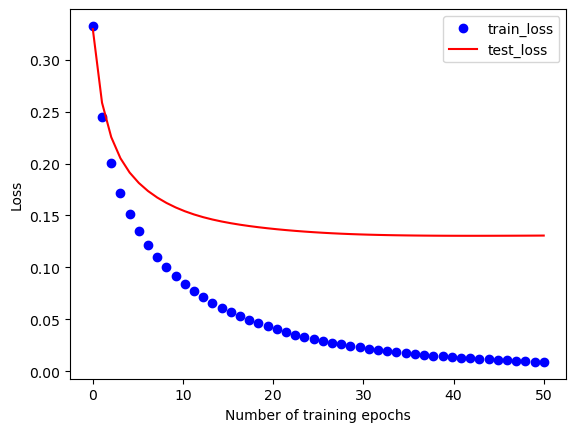

In [8]:
import matplotlib.pyplot as plt
epochs = np.linspace(0,N_epoch)
plt.plot(epochs, np.abs(train_loss), 'bo',label='train_loss')
plt.plot(epochs, np.abs(test_loss), 'r',label='test_loss')
plt.xlabel('Number of training epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Sequential(
  (0): Linear(in_features=784, out_features=300, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=300, out_features=200, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=200, out_features=10, bias=True)
)
Epoch: 000, train loss: 0.3323521, test loss: 0.3292393, train acc: 0.1283649, test acc: 0.1348527
Epoch: 001, train loss: 0.2445382, test loss: 0.2584822, train acc: 0.3052205, test acc: 0.3082205
Epoch: 002, train loss: 0.2006992, test loss: 0.2253929, train acc: 0.3405184, test acc: 0.3432524
Epoch: 003, train loss: 0.1720468, test loss: 0.2050574, train acc: 0.3601413, test acc: 0.3584793
Epoch: 004, train loss: 0.1511584, test loss: 0.1912974, train acc: 0.3705357, test acc: 0.3692277
Epoch: 005, train loss: 0.1347989, test loss: 0.1812663, train acc: 0.3806137, test acc: 0.3820661
Epoch: 006, train loss: 0.1213470, test loss: 0.1734988, train acc: 0.3852279, test acc: 0.3841561
Epoch: 007, train loss: 0.1099555, test loss: 0.1672486, train acc: 0.3885261, t

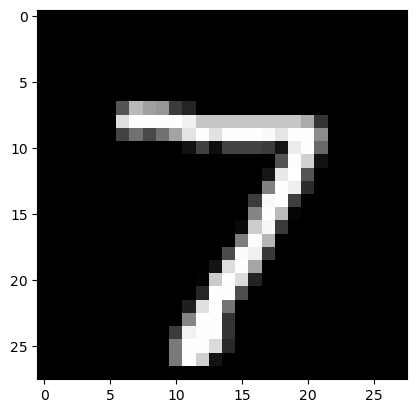

In [3]:
import numpy as np
import torch
import torchvision
from torchvision import datasets, transforms
from torch import nn, optim
import matplotlib.pyplot as plt

# ################## Part 1: load data and create batch ##################
trainset = datasets.MNIST('Train', transform=torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()]), download=True, train=True)
testset = datasets.MNIST('Test', transform=torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()]), download=True, train=False)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=64)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64)

# ################## Part 2: Define Model and initialize ##################
model = nn.Sequential(nn.Linear(784, 300, bias=True),
                      nn.Sigmoid(),
                      nn.Linear(300, 200, bias=True),
                      nn.Sigmoid(),
                      # nn.Linear(100, 50, bias=False),
                      # nn.Sigmoid(),
                      nn.Linear(200, 10, bias=True))
#nn.Tanh()

print(model)

# ############## This part can be changed to different initialization
# Initialize as 0

# Initialize as uniform [-1, 1]
for p in model.parameters():
    p.data.uniform_(0, 0)


# def init_weights(m):
#    if isinstance(m, nn.Linear):
#        m.weight.data.uniform_(-1, 1)
#        m.bias.data.uniform_(-1, 1)

# Initialize as normal
# m.bias.data.normal_(0, 1)
# m.weight.data.normal_(0, 0.03)
#
# ########################################################################

# ################## Part 3: Define Loss and optimizer ##################

# ######## This can be changed to different loss function, e.g., L2loss
# ######## and different optimization parameter，e.g. regularization, learning rata.
#criterion = torch.nn.L2Loss()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.02, weight_decay=0.1)


# ########################################################################


def accuracy(out, labels):
    acc = (out.argmax(1) == labels).float().mean()
    return acc.item()


# ################## Part 4: Optimization ##################
def train_NN():
    model.train()
    acc = 0
    for images, labels in train_loader:
        images = images.view(images.shape[0], -1)
        out = model(images)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        acc += accuracy(out, labels)
    acc = acc / len(train_loader)
    return loss, acc


def test_NN(loader):
    model.eval()
    acc = 0
    loss = 0
    for images, labels in loader:
        images = images.view(images.shape[0], -1)
        out = model(images)
        loss += criterion(out, labels)
        acc += accuracy(out, labels)
    acc = acc / len(loader)
    loss = loss / len(loader)
    return loss, acc


N_epoch = 50
train_lossz = np.zeros((N_epoch, 1))
test_lossz = np.zeros((N_epoch, 1))
train_acc = np.zeros((N_epoch, 1))
test_acc = np.zeros((N_epoch, 1))
for epoch in range(N_epoch):
    loss1, acc1 = train_NN()
    train_lossz[epoch, 0], train_acc[epoch, 0] = test_NN(train_loader)
    test_lossz[epoch, 0], test_acc[epoch, 0] = test_NN(test_loader)
    print(
        f'Epoch: {epoch:03d}, train loss: {train_loss[epoch, 0]:.7f}, test loss: {test_loss[epoch, 0]:.7f}, train acc: {train_acc[epoch, 0]:.7f}, test acc: {test_acc[epoch, 0]:.7f}')
    
# ################## Part 5: Visualization of test ##################
# Here, we use the test data in first batch to visualize our prediction
test_images, test_labels = next(iter(test_loader))
test_images = test_images.view(test_images.shape[0], -1)
out = model(test_images)
predictions = out.argmax(1)

# Choose an index of test data
index = 0
plt.imshow(test_images[index].reshape(28, 28), cmap="gray")
print('The predicted number is', predictions[index].item())
plt.show()

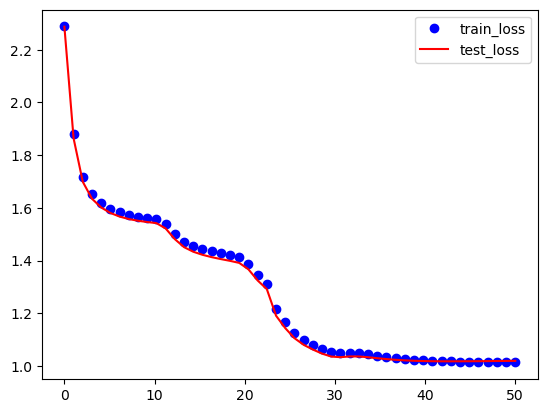

In [4]:
import matplotlib.pyplot as plt
epochs = np.linspace(0,N_epoch)
plt.plot(epochs, np.abs(train_lossz), 'bo',label='train_loss')
plt.plot(epochs, np.abs(test_lossz), 'r',label='test_loss')
plt.legend()
plt.show()

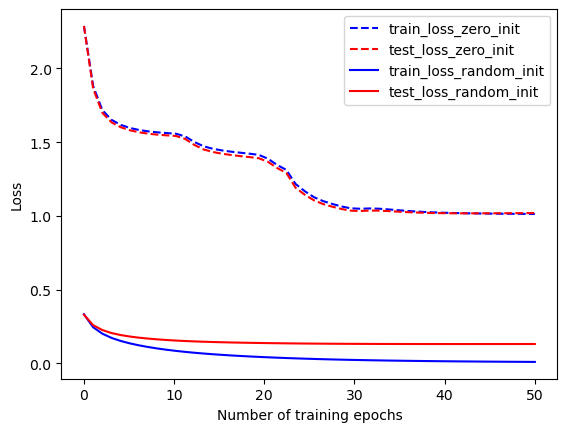

In [7]:
import matplotlib.pyplot as plt
import numpy as np 
epochs = np.linspace(0,50)
plt.plot(epochs, np.abs(train_lossz), 'b--',label='train_loss_zero_init')
plt.plot(epochs, np.abs(test_lossz), 'r--',label='test_loss_zero_init')
plt.plot(epochs, np.abs(train_loss), 'b',label='train_loss_random_init')
plt.plot(epochs, np.abs(test_loss), 'r',label='test_loss_random_init')
plt.xlabel('Number of training epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()


